# Particle identification model : Attempt 2 Neural network

In [16]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils import shuffle
import scikitplot as skplt 
import keras

In [56]:
data=pd.read_csv('particle_data.csv')
data[data.id == 211] = 0
data[data.id == -11] = 1
data[data.id == 321] = 2
data[data.id == 2212] = 3

In [57]:
data = shuffle(data)
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('id',axis=1), data['id'],test_size=0.2,random_state=0)

In [58]:
NB_EPOCH = 2 # ile razy ćwiczyć sieć dla danego podzbioru danych
BATCH_SIZE = 32 #wielkość podzbioru
VERBOSE = 1
NB_CLASSES = 4 # number of outputs = number of digits
OPTIMIZER = Adam() 
N_HIDDEN = 6
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

In [59]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(6,))) #iN +HIDDEN
model.add(Activation('relu')) #IN -> RELU(IN)-> HIDDEN
model.add(Dense(NB_CLASSES)) #OUT
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
activation_13 (Activation)   (None, 6)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 28        
_________________________________________________________________
activation_14 (Activation)   (None, 4)                 0         
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________
Train on 3200000 samples, validate on 800000 samples
Epoch 1/2
3200000/3200000 [==============================] - 279s 87us/step - loss: 0.0143 - acc: 0.9962 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
3200000/3200000 [==============================] - 268s 84us/step - l

### Analysis of the performance of the model

In [60]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Accuracy score for test data: ',score[1])    
score = model.evaluate(X_train, Y_train, verbose=VERBOSE)
print('Accuracy score for training data: ',score[1])    

1000000/1000000 [==============================] - 33s 33us/step
Accuracy score for test data:  1.0
4000000/4000000 [==============================] - 138s 35us/step
Accuracy score for training data:  1.0


In [74]:
predictions = model.predict_classes(X_test)
from numpy import argmax
Y_test_undo=argmax(Y_test,axis=-1)

### Confusion matrix for test data

In [76]:
print(classification_report(Y_test_undo, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    562072
           1       1.00      1.00      1.00      2993
           2       1.00      1.00      1.00     46381
           3       1.00      1.00      1.00    388554

    accuracy                           1.00   1000000
   macro avg       1.00      1.00      1.00   1000000
weighted avg       1.00      1.00      1.00   1000000



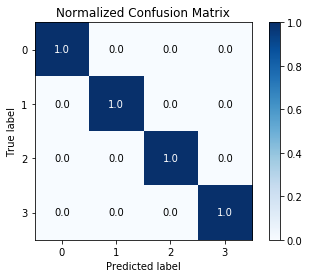

In [70]:
skplt.metrics.plot_confusion_matrix(Y_test_undo, predictions, normalize=True)

### Confusion matrix for training data

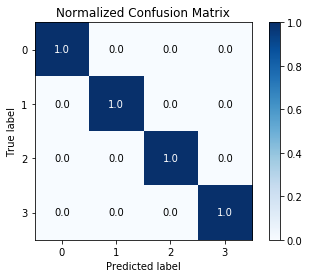

In [71]:
predictions = model.predict_classes(X_train)
from numpy import argmax
Y_train_undo=argmax(Y_train,axis=-1)
skplt.metrics.plot_confusion_matrix(Y_train_undo, predictions, normalize=True)

## Conclusions:
* <b> Wonderful performance </b>
* <b> Distniguish well all types of particles </b>
* <b> doesn't need a lot of layers one hidden is enough, doesn't need many epochs 2 are fine
* <b> it works so good because the data size is large </b>